---
# <center> **Foundations of Applied Machine Learning**
## <center> Winter 2025

### <center> **Prof. Bahram Mobasher**
### <center> Teaching Assistant: **[Sina Taamoli](https://sinataamoli.github.io/)** | email: *sina.taamoli@email.ucr.edu* | [Course webpage](https://github.com/sinataamoli/Foundations-of-Applied-Machine-Learning)
### <center> Week 9 (Mar 7): Stochastic & Mini Batch Gradient Descent - Decision Trees
---

In [1]:
import numpy as np 
import random 
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.linear_model import LinearRegression

# font parameters dictionary
font = {'family' : 'serif',
        'weight' : 'bold',
        'size'   : 18,}

# figure parameters dictionary
figure = {"figsize" : (6,6),
          "dpi" : 120,
          "facecolor" : "w", 
          "edgecolor" : "k",}

# use LaTeX fonts in the plot
plt.rc('text', usetex=True)

# ticks settings
plt.rc('xtick',labelsize=10)
plt.rc('ytick',labelsize=10)

# axes setting
plt.rc('axes', titlesize=22, labelsize=18)     # fontsize of the axes title, labels

# Set the font parameters
plt.rc('font', **font) 

# Set the figure parameters 
plt.rc("figure", **figure)

Making some random data points:

In [2]:
X = 3.2 * np.random.rand(100, 1)
y = 1.5 + 1.9 * X + np.random.randn(100, 1)

Adding the dummy feature $x_{j,0} = 1$:

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

According to our previously found solution:
$$
\begin{equation*}
w = (X^\intercal X)^{-1} X^\intercal y
\end{equation*}
$$


In [4]:
inv = np.linalg.inv
weight_best = inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

This is the weights we found:

Now that we have the best weights, we can make a prediction about the following $X_{new}$: 

In [5]:
X_new = np.array([[0], [3.2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance

# Gradient Descent:


The basic idea is to tweak the parameters until you reach to the optimal solution. So the idea is to make best decision locally. So finding the gradient at each point starting from some **random initialization** and moving along the direction of the gradient (or oppose for finding minimum) till we reach to the optimal point with zero gradient. Imagine your hiking on the mountain an trying to get to the peak in the most. You can make the decision to move along the path that makes the maximum change in height. (Not a wise decision when you are actually hiking!) That's how can we reach to the top in minimal fashion.

# Linear regression with batch gradient descent:


The first thing we should do is to find the cost/loss function ($L$) and the gradient of the cost function with respect to it's parameters ($w_j$) so basically we need to find the following:

$$
\begin{equation*}
\frac{dL}{d\vec{w}}|_{X} = \vec{\nabla}_{w_i} L(X, \vec{w}) = \vec{\nabla}_{w_i} L_2(X, \vec{w})
\end{equation*}
$$

And in the case linear regression we have $L_2$ which is the squared error loss function, so we can find the gradient first and then define the steps for walking towards the optimal point on the surface.

In [6]:
def L_2(_X_, _y_, _w_):
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
    
    s_loss = (_X_.dot(_w_) - _y_)
    
    Loss =  1 / Num * s_loss.T.dot(s_loss)
    return Loss

In [7]:
def weight_space(_w_): return L_2(X_b, y, _w_)

In [8]:
w0_span = np.linspace(0.5, 3, 100)
w1_span = np.linspace(0.5, 3, 100)

w0, w1 = np.meshgrid(w0_span, w1_span)


z_loss = [(w_0, w_1, weight_space([w_0, w_1])) for _w_0, _w_1 in zip(w0, w1) for w_0, w_1 in zip(_w_0, _w_1)]  
z = np.array([z[2] for z in z_loss])

global_min = min(z)

z = np.reshape(z, (100, 100))

In [9]:
def plot_L_2_Loss_function(angle=[0, 30]):
    import matplotlib.pyplot as plt
    from mpl_toolkits.mplot3d import Axes3D
    from matplotlib import cm
    from matplotlib.ticker import LinearLocator, FormatStrFormatter

    fig = plt.figure(figsize=(10, 8))
    ax = plt.axes(projection = '3d')
    ax.view_init(azim = 120, elev = 30)


    # Plot the surface.
    surf = ax.plot_surface(w0, w1, z, cmap=cm.coolwarm,
                           linewidth=0, antialiased=True,
                           alpha = 0.4)

    ax.scatter3D(weight_best[0], weight_best[1], global_min, s=40, marker="*", label=r"Global minimum")


    plt.title(r"Gradient Descent")
    ax.view_init(angle[0], angle[1])


    ax.set_xlabel("$w_0$")
    ax.set_ylabel("$w_1$")
    ax.set_zlabel("L", rotation = 0)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=16)

    plt.legend(fontsize=14, loc=(0.7, 0.7))
    return fig, ax

In [10]:
def L_2_heatmap():
    fig = plt.figure(figsize=(8,7))
    plt.scatter(w0, w1, c = z, cmap=cm.coolwarm)

    plt.xlabel(r"$w_0$")
    plt.ylabel(r"$w_1$")

    plt.colorbar()
    return fig

In [11]:
def Gradient_LR(_X_, _y_, _w_):
    """
    This is the function to find the gradient of the Linear regression
    loss function:
    
    gradient(L_2)_w = (2 / N) * X^T * (X*w - y) 
    
    N: Number of examples
    n: Number of features (including the intercept)
    
    INPUT:
    ======
            _X_ (a matrix of size (N, n)) : 
                                            [[X11=1, X12, ..., X1n],
                                             [X21=1, X22, ..., X2n],
                                             .
                                             .
                                             .
                                             [XN1=1, XN2, ..., XNn]]
           
           
           _y_ (a vector (matrix) of size (N, 1)): [[y1],
                                                    [y2],
                                                    .
                                                    .
                                                    .
                                                    [yN]]
                                                    
                                                
           _w_ (a vector (matrix) of size (n, 1)): [[w0],
                                                    [w1],
                                                    [w2],
                                                    .
                                                    .
                                                    .
                                                    [wn]]
                                                    
    OUTPUT:
    ======
           
            The gradient vector in the shape (n, 1)
     
    """
    
    
    # Finding the number of examples and features
    Num = len(_y_) # N
    num = len(_w_) # n
    
    # Reshaping _y_ with shape(1, N) to (N, 1)
    _y_ = np.reshape(_y_, (Num, 1))
    # Reshaping _w_ with shape(1, n) to (n, 1)
    _w_ = np.reshape(_w_, (num, 1))
        
    
    # single loss: (X.w - y)
    _Loss_ = _X_.dot(_w_) - _y_
    
    # 2/num * X^T (n, N) * loss (N, 1) 
    grad_sum_loss = (2 / Num) * _X_.T.dot(_Loss_)
    return grad_sum_loss

### Finding learning rate/walking steps

$$
\begin{equation*}
\vec{w}_{next} = \vec{w} - \eta \nabla_{w}{L_2(X, y, w)}
\end{equation*}
$$

In [12]:
def BGD(X_b, y, eta=0.1, n_iterations=100):
    m = len(y)
    theta = np.random.randn(2,1)
    
    theta_list = []
    for iteration in range(n_iterations):
        gradients = Gradient_LR(X_b, y, theta)
        theta = theta - eta * gradients
        theta_list.append(theta)
    return theta, theta_list

def plot_batch_gradient_descent(X, y, theta_l, eta):
    plt.plot(X, y, ".", color="indigo")
    x_0, x_1 = min(X), max(X)
    
    for i, theta in enumerate(theta_l):
        b, m = theta[0], theta[1]
        def f(x): return m*x+b
        colors = ["#039F1B", "orangered"]
        if i==0: 
            color=colors[i] 
        else: 
            color=colors[-1] 
        
        plt.plot([x_0, x_1], [f(x_0), f(x_1)], color=color)
        plt.title(r"$\eta={}$".format(eta))

# Stochastic Gradient Descent

This is a function to find the optimal point by moving randomly within data points and updating the value of the weights in according to the gradient of the loss function at that point. So we should remember that the loss function here only depend on the position of one point every time not the poisition of all the data points which means that although we are moving along the opposite of the gradient of the loss function, we could perform worse since that the gradient is only representative of the loss function at that particular point and not necesseraily rest of the data points. That is why we see huge fluctuation in the performance (Loss function vs number of iterations)

squared error loss:
$$
\begin{equation*}
L_{2} = (X.\vec{w} - y)^{2}
\end{equation*}
$$


In [13]:
def SGD(X_b, y, eta=0.02, num_interation=100, seed=110, schedule = None):
    """
    Stochastic Gradient Descent for linear regression:
    
    This is a function to find the optimal point by moving 
    randomly within data points and updating the  value of
    the weights in according to the gradient  of the  loss 
    function at that point. So we should remember that the 
    loss function here only depend on  the position of one 
    point every time not the poisition  of  all  the  data 
    points which means that although  we  are moving along 
    the opposite of the gradient of  the loss function, we 
    could perform worse  since that  the  gradient is only 
    representative of the loss function at that particular 
    point and not necesseraily rest of the data points. 
    
    
    INPUT:
    ------
    
     
    """
    import numpy as np
    
    # Definig the learning schedule function with the 
    # following learning schedule hyperparameters :
    t0, t1 = 2, 50 
    
    def learning_schedule(t):
        return t0 / (t + t1)
    
    # pass the seed to the numpy.random.seed 
    np.random.seed(seed)
    
    # randomly assigning weights with the size of of number of features 
    theta = np.random.randn(len(X_b[0]),1)  # random initialization
    
    # a list that will store every weights steps
    theta_batch = [theta]
    
    # A for loop for the number of iteratations of going through the data
    # the default number is 100
    for iteration in range(num_interation):
        # finding number of examples
        length_y = len(y)
        
        # A for loop for going through every example, and to update the 
        # weights accordingly
        for i in range(length_y):
            # choosing a random index
            random_index = np.random.randint(length_y)
            
            # Finding corresponding data for the index
            xi =  X_b[random_index]
            yi = y[random_index]

            # Finding the gradient at this point (xi, yi)
            gradients = 2 * xi * (xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            # if it is true will update the learning rate every time, look 
            # at the learning_schedule function for more details about this 
            # option
            if schedule:
                eta = learning_schedule(length_y * iteration + i)
                
            # Update the weights according to the gradient 
            theta = theta - eta * gradients
            
            # Store it in the weights list
            theta_batch.append(theta)
            
    return theta_batch      
    
theta_ = SGD(X_b, y, 0.0001, schedule=True)

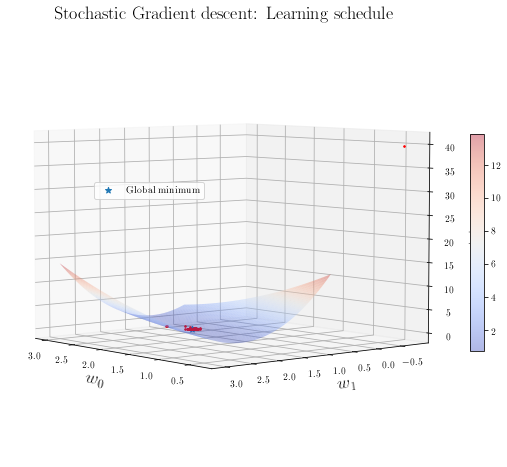

In [14]:
fig, ax = plot_L_2_Loss_function([5, 140])

for i, theta in enumerate(theta_[::20]):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.title(r"Stochastic Gradient descent: Learning schedule", fontsize = 18)


plt.show()

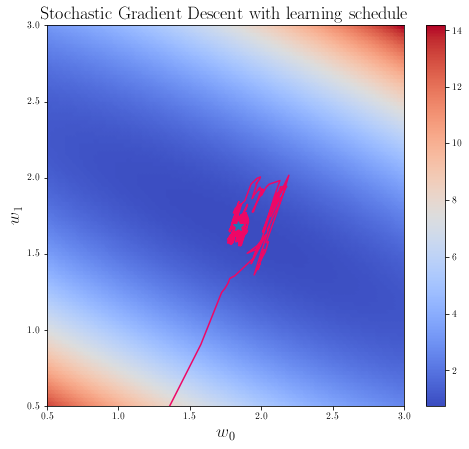

In [15]:
L_2_heatmap()
theta_ = np.array(theta_).reshape(len(theta_),2)

fig_h_3 = plt.plot(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")

plt.plot(weight_best[0], weight_best[1], marker="*", markersize=10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

plt.title(r"Stochastic Gradient Descent with learning schedule", fontsize = 18)

plt.show()

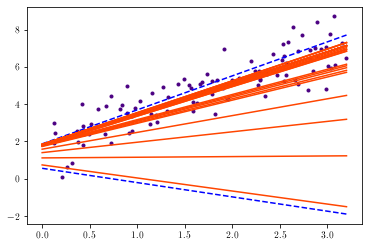

In [19]:
def Find_plot_SGD(X, y, eta=0.02, num_interation=100, seed=110, schedule=None):
    np.random.seed(seed)
    theta = np.random.randn(2,1)  # random initialization
    theta_batch = [theta]
    t0, t1 = 2, 50 
    def learning_schedule(t):
        return t0 / (t + t1)
    
    fig = plt.scatter(X, y, marker=".", color="indigo")

    j=0
    for iteration in range(num_interation):
        length_y = len(y)

        for i in range(length_y):
            random_index = np.random.randint(length_y)
            xi =  X_b[random_index]
            yi = y[random_index]


            gradients = 2 * xi*(xi.dot(theta) - yi)
            gradients = gradients.reshape(2,1)
            
            if schedule:
                eta = learning_schedule(length_y*(iteration)+i)
                
            theta = theta - eta * gradients
            theta_batch.append(theta)

            if i<10 and iteration in {0, 1, 43, 199}:
                y_predict = X_new_b.dot(theta) 


                style = "orangered" if i > 0 else "b--"         # not shown
                plt.plot(X_new, y_predict, style, label="iteration"+str(iteration+1))
    return fig, theta_batch      
    
fig_xy_3, theta_ = Find_plot_SGD(X, y, 0.001, schedule=True)

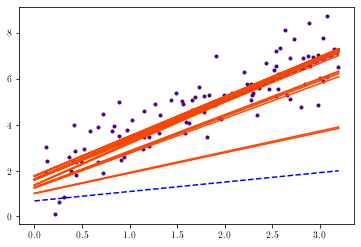

In [28]:
num = 100
seed = 988

fig2, theta_2_list = Find_plot_SGD(X,y, num_interation = num, seed=seed, schedule=True)

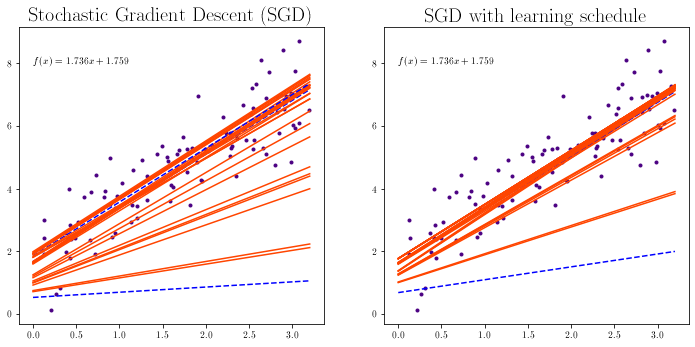

In [29]:
plt.figure(figsize=(12,12))
plt.subplot(221 );
fig1, theta_1_list = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule = None)


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"Stochastic Gradient Descent (SGD)", fontsize=20)


plt.subplot(222);
fig1, theta_2_list = Find_plot_SGD(X,y, num_interation=num, seed=seed, schedule=True)


plt.text(0, 8, "$f(x) = {}x + {}$".format(round(float(theta_1_lis[-1][1]), 3), round(float(theta_1_lis[-1][0]), 3)))
plt.title(r"SGD with learning schedule", fontsize=20)

plt.show()

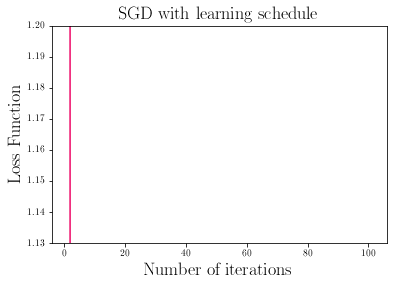

In [27]:
l_2 = []
for theta in theta_2_list:
    l_2.append(weight_space(theta))

l_2 = [l2[0] for l2 in l_2[::50]]

plt.title(r"SGD with learning schedule", fontsize=18)
fig__loss_3 = plt.plot(range(1, len(l_2)+1), l_2,  c = "#EE0766")

plt.ylabel(r"Loss Function")
plt.xlabel(r"Number of iterations")

plt.ylim(1.13, 1.2)

plt.show()

Now let's take a look at the same thing but using `sklearn.linear_model.SGDRegressor`

In [30]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=10000, 
                       tol=-np.infty, 
                       penalty=None, 
                       eta0=0.1, 
                       random_state=88)
sgd_reg.fit(X, y.ravel())

SGDRegressor(eta0=0.1, max_iter=10000, penalty=None, random_state=88, tol=-inf)

In [31]:
sgd_reg_optimal = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="optimal",
                             random_state=88)

sgd_reg_optimal.fit(X, y.ravel())

SGDRegressor(early_stopping=True, learning_rate='optimal', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [32]:
sgd_reg_valid = SGDRegressor(max_iter=10000, 
                             tol=-np.infty, 
                             penalty=None,
                             loss="squared_loss", 
                             early_stopping=True, 
                             learning_rate="adaptive", 
                             validation_fraction=0.1,
                             random_state=88)

sgd_reg_valid.fit(X, y.ravel())

SGDRegressor(early_stopping=True, learning_rate='adaptive', max_iter=10000,
             penalty=None, random_state=88, tol=-inf)

In [33]:
print("Intercept: ", sgd_reg.intercept_, "Coefficient: ", sgd_reg.coef_, "with SGD from skit-learn")
print("Intercept: ", sgd_reg_valid.intercept_, "Coefficient: ", sgd_reg_valid.coef_, "with SGD with validations from skit-learn")
print("Intercept: ", sgd_reg_optimal.intercept_, "Coefficient: ", sgd_reg_optimal.coef_, "with Optimal SGD from skit-learn")


print("Intercept: ", weight_best[0], "Coefficient: ", weight_best[1], "with Analytical")

Intercept:  [1.83479505] Coefficient:  [1.68286079] with SGD from skit-learn
Intercept:  [1.69782261] Coefficient:  [1.73178521] with SGD with validations from skit-learn
Intercept:  [1.69695702] Coefficient:  [1.73072575] with Optimal SGD from skit-learn
Intercept:  [1.83549119] Coefficient:  [1.68104052] with Analytical


# Mini-batch gradient descent:

A compromise between Batch Gradient Descent and SGD. It splits the dataset into smaller batches and computes the gradient for each mini-batch.

In [34]:
def Mini_BGD(_X_, _y_, n_epochs=50, mini_batch_size=int(0.1*len(y)), eta=0.1, schedule=None, random_seed=100):
    # Importing numpy
    import numpy as np
    
    # Finding the number of examples and features
    Num = len(_y_) # N examples
    num = len(_X_[0]) # n features
    
    # Definig the learning schedule function with the 
    # following learning schedule hyperparameters :
    t0, t1 = 5, 50 
    
    def learning_schedule(t):
        return t0/(t + t1)

    
    # Weights list
    weights = np.random.randn(num, 1)
    weights_list = []
    
    np.random.seed(random_seed)
    
    # go through n_epochs iterations/epochs
    for epoch in range(n_epochs):
        random_indices = np.random.permutation(Num)
        _X_shuffled = _X_[random_indices]
        _y_shuffled = _y_[random_indices]
        
        for t, j in enumerate(range(0, Num, mini_batch_size)):
            X = _X_shuffled[j:j+mini_batch_size]
            y = _y_shuffled[j:j+mini_batch_size]
            gradients = Gradient_LR(X, y, weights)
            
            if schedule: 
                eta = learning_schedule(t)
            
            weights = weights - eta * gradients
            
            weights_list.append(weights)
            
    return weights_list

In [35]:
weights_list = Mini_BGD(X_b, y)

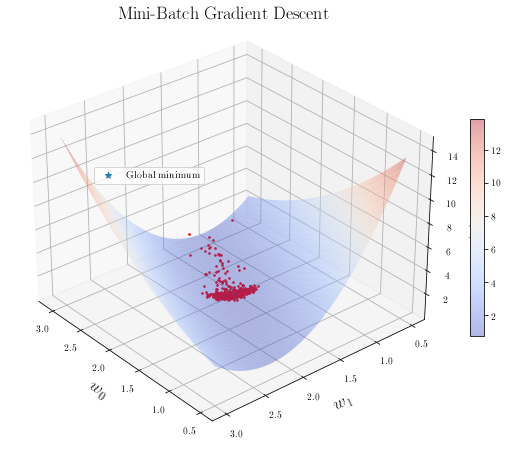

In [36]:
fig, ax = plot_L_2_Loss_function([30, 140])

for i, theta in enumerate(weights_list):
    ax.scatter3D(theta[0], theta[1], weight_space(theta), s=10, marker=".", color = "r")
    
plt.legend(loc=(0.2,0.6))

plt.title(r"Mini-Batch Gradient Descent", fontsize = 18, y=1.05)

plt.show()

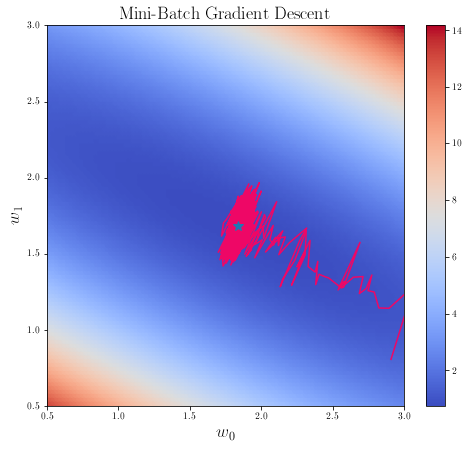

In [37]:
fig_h_4 = L_2_heatmap()
theta_ = np.array(weights_list).reshape(len(weights_list),2)

plt.plot(theta_[:,0], theta_[:, 1], color="#EE0766")#  s=5, marker=".", c = "#EE0766")

plt.plot(weight_best[0], weight_best[1], marker="*", markersize=10)

plt.xlim(0.5, 3)
plt.ylim(0.5, 3)

plt.title(r"Mini-Batch Gradient Descent", fontsize = 18)

plt.show()

__Discussion on Logistic, lasso, ...__

# Decision Trees:

First start with a special case of **Regression or Classification Tree (CART)**:


A **node** which represents a single input $X$ and we split the data. And there are **Leaf nodes** that are the end results of each branch. 

Take a look at the following example:

In [38]:
np.random.seed(22)

x_c1 = 1.5 * np.random.random(4)
y_c1 = 4 * np.random.random(4)

x_c2 = 2 + 1.5 * np.random.random(5)
y_c2 = 4 * np.random.random(5)

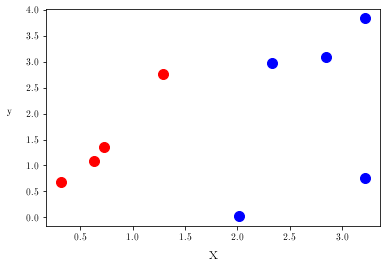

In [39]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.text(s=r"y", x=-0.2, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

As you can see making a decision about a color of a given point we can just use the $x$ values. For example we can say any point with $x>1.8$ is blue and the rest are red.

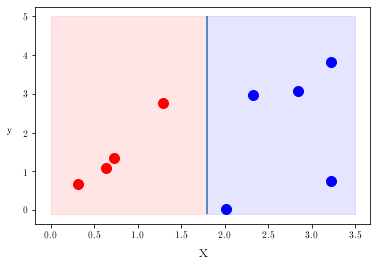

In [40]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

So this is how our decision tree looks like: 

In [41]:
from _plotting_ import _plot_trees_

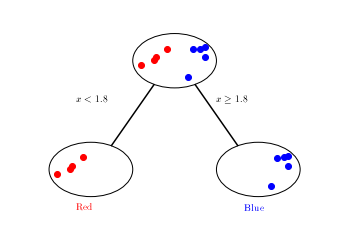

In [42]:
_plot_trees_()

plt.show()

Now let's make another class:

In [43]:
np.random.seed(22)
x_c3 = -0.3 + 2.2*np.random.random(4)
y_c3 = 3.5 + np.random.random(4)

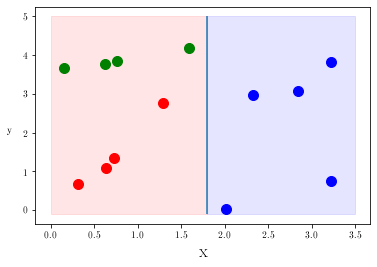

In [44]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)

plt.fill_between([0, 1.8], [-0.1, -0.1], [5, 5], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)

    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

In the plot you see the first criteria is not sufficient. So let's tweak it a bit. As you can see our classifier is still good for making decision about blue. But for making decision about green and red, so we need another classifier like $y<3.1$ if $x<1.8$:

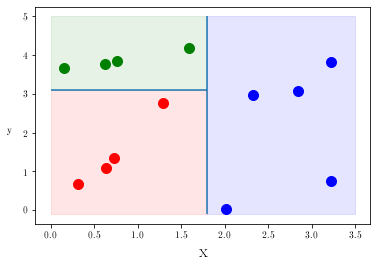

In [45]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(1.8, -0.1, 5)
plt.hlines(3.1, 0, 1.8)

plt.fill_between([0, 1.8], [-0.1, -0.1], [3.1, 3.1], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)
plt.fill_between([0, 1.8], [3.1, 3.1], [5, 5], color="green", alpha=0.1)
    
plt.text(s=r"y", x=-0.5, y=2, rotation=0)
plt.xlabel(r"x")

plt.show()

Which means that we add another branch to a decision tree:

In [46]:
from _plotting_ import _plot_tree_2

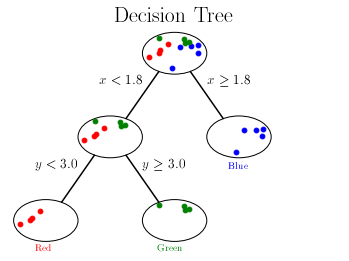

In [47]:
_plot_tree_2()
plt.show()

Now let's define a concept of a **Gini Impurity**.

# Gini Impurity:

Let's go to this example again:

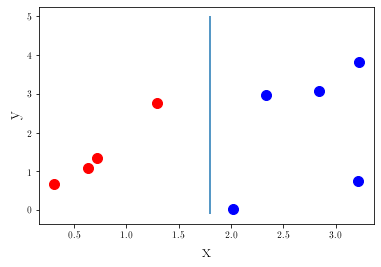

In [48]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 5)

plt.xlabel(r"x")
plt.ylabel(r"y")

plt.show()

So this is how does the split works:
* Left branch has 4 Reds
* Right branch has 5 Blues

Which is a perfect split but what about $x<2.1$ as our classifier:

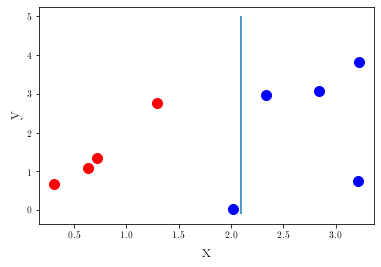

In [49]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(2.1, -0.1, 5)
plt.ylabel(r"y")
plt.xlabel(r"x")

plt.show()

* Left branch has 4 Reds and 1 Blue
* Right branch has 4 Blues

How can we define a quantitative measure for how good our split is **Gini impurity**.

If $C$ is the set of our classes and $p(c)$ is the probability of a picking a datapoint with class $c \in C$, then the **Gini impurity** is:
$$
\begin{equation*}
G = \sum_{c \in C} p(c) (1 - p(c))
\end{equation*}
$$

In our example we have for the root node:

$$
\begin{equation*}
G_0 = p(\textrm{Blue}) (1 - p(\textrm{Blue})) + p(\textrm{Red}) (1 - p(\textrm{Red}))
\end{equation*}
$$

$$
\begin{equation*}
G_0 = 5/9 * (1 - 5/9) + 4/9 * (1 - 4/9) = 0.494
\end{equation*}
$$



And for the left and right branch of perfect classifier we have:

$$
\begin{equation*}
G_{Left} = 1 * (1-1) = 0 
\end{equation*}
$$
$$
\begin{equation*}
G_{Right} = 1 * (1-1) = 0
\end{equation*}
$$

Which is a perfect score and means that we have a perfect classifier.


But in the case of our imperfect example we have:
$$
\begin{equation*}
G_{Left} = 4/5 * (1-4/5) + 1/5 * (1-1/5) = 0.32
\end{equation*}
$$
$$
\begin{equation*}
G_{Right} = 1 * (1-1) = 0
\end{equation*}
$$

Which shows that our left branch has some impurity in it with the measure of $G=0.32$.


We will determine the quality of the split by weighting the impurity of each branch by how many elements it has. which means:

$$
\begin{equation*}
G_1 = (4/9 * 0) + 5/9 * (0.32) = 0.178
\end{equation*}
$$


So the change in impurity means is the **Gini Gain**:

$$
\begin{equation*}
\Delta G = G_0 - G_1 = 0.5 - 0.178 = 0.32
\end{equation*}
$$


So the higher the Gini gain the better classification we have (better splits). So we make a decision based on the highest Gini gain.

## Train the nodes:

First let's choose set of possible splits:


In [50]:
splits = [0.4, 0.67, 1, 1.8, 2.2, 2.5, 3.1]

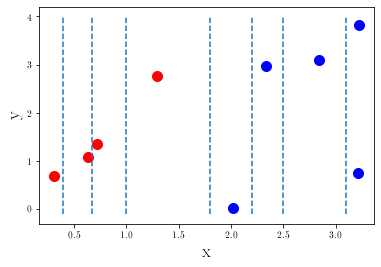

In [51]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
for split in splits:
    plt.vlines(split, -0.1, 4, linestyles="dashed")

    
plt.ylabel(r"y")
plt.xlabel(r"x")

plt.show()

In [52]:
@np.vectorize
def gini(p): return p * (1 - p)

def Gini_impurity(groups):
    prob = np.zeros(len(groups))
    
    tot=0
    
    if len(groups) == 1:
        return 0
    
    for i, group in enumerate(groups):
        group_size = len(group)
        prob[i] = group_size
        tot+=group_size
        
    prob = prob/tot
    gini_vec = gini(prob)
    
    
    return sum(gini_vec)

In [53]:
_dic_ = {"r" : x_c1, "b" : x_c2} 

def split_data(data, splits):
    _list_of_groups_splits = []
    for split in splits:
        _list_of_groups_splits.append([data[data<=split], data[data>split]])
    return _list_of_groups_splits


def devide_to_subgroups(_list_of_groups_splits, _dic_):
    keys = list(_dic_.keys())
    Full= []
    
    for groups in _list_of_groups_splits:
        dummy1 = []
        for group in groups:
            dummy ={key:[] for key in keys}
            
            for key in keys:
                for e in group:
                    if e in _dic_[key]:
                        dummy[key].append(e)
            full_g = [dummy[key] for key in keys if dummy[key]]
            dummy1.append(full_g)
            
        Full.append(dummy1)
    return Full

In [54]:
x_c12 = np.append(x_c1, x_c2)
y_c12 = np.append(y_c1, y_c2)

groups_splited = devide_to_subgroups(split_data(x_c12, splits), _dic_)

In [55]:
root_node = [x_c1, x_c2]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.49382716049382713 
 ===

The Gini Impurity for split 1 is = 0.312 
The Gini gain is =  0.181 
 -------

The Gini Impurity for split 2 is = 0.272 
The Gini gain is =  0.222 
 -------

The Gini Impurity for split 3 is = 0.185 
The Gini gain is =  0.309 
 -------

The Gini Impurity for split 4 is = 0.0 
The Gini gain is =  0.494 
 -------

The Gini Impurity for split 5 is = 0.213 
The Gini gain is =  0.28 
 -------

The Gini Impurity for split 6 is = 0.296 
The Gini gain is =  0.198 
 -------

The Gini Impurity for split 7 is = 0.327 
The Gini gain is =  0.167 
 -------



Which tells us the split 4 was the best split which was our initial guess:

In [56]:
splits[3]

1.8

In [57]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)
gain_split

[(0.49382716049382713, 1.8),
 (0.3086419753086419, 1),
 (0.28049382716049376, 2.2),
 (0.22171831695641214, 0.67),
 (0.1975308641975308, 2.5),
 (0.18132716049382713, 0.4),
 (0.1672965482489292, 3.1)]

Which is the sorted Gini gains and their corresponding splits.


Let's split the y axis in the same fashion:

In [58]:
y_splits = [0.2, 1, 1.2, 2.5, 3, 3.5]

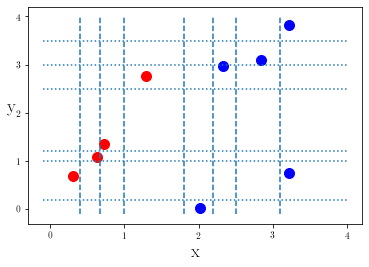

In [59]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
for split in splits:
    plt.vlines(split, -0.1, 4, linestyles="dashed")


for split in y_splits:
    plt.hlines(split, -0.1, 4, linestyles="dotted")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

In [60]:
_dic_ = {"r" : y_c1, "b" : y_c2} 

groups_splited_y = devide_to_subgroups(split_data(y_c12, y_splits), _dic_)

In [61]:
root_node = [y_c1, y_c2]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited_y):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.49382716049382713 
 ===

The Gini Impurity for split 1 is = 0.333 
The Gini gain is =  0.16 
 -------

The Gini Impurity for split 2 is = 0.472 
The Gini gain is =  0.022 
 -------

The Gini Impurity for split 3 is = 0.49 
The Gini gain is =  0.004 
 -------

The Gini Impurity for split 4 is = 0.428 
The Gini gain is =  0.066 
 -------

The Gini Impurity for split 5 is = 0.327 
The Gini gain is =  0.167 
 -------

The Gini Impurity for split 6 is = 0.333 
The Gini gain is =  0.16 
 -------



In [62]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)
gain_split

[(0.1672965482489292, 2.2),
 (0.16049382716049382, 2.5),
 (0.16049382716049382, 0.4),
 (0.06632716049382714, 1.8),
 (0.021604938271604923, 0.67),
 (0.003827160493827142, 1)]

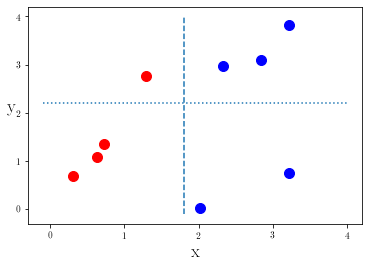

In [63]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
    
plt.vlines(1.8, -0.1, 4, linestyles="dashed")

plt.hlines(2.2, -0.1, 4, linestyles="dotted")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

These are the best classifier on seperate features.

This does the same thing using `sklearn`:

In [64]:
from sklearn.tree import DecisionTreeClassifier

In [65]:
labels = ["red" for x in x_c1]+["blue" for y in x_c2]

In [66]:
x_c12 = x_c12.reshape((len(x_c12), 1))

In [67]:
DTC = DecisionTreeClassifier(criterion="gini", max_depth=1,)

In [68]:
DTC.fit(x_c12, labels)

DecisionTreeClassifier(max_depth=1)

In [69]:
print(DTC.predict([[1.7]]), DTC.predict([[1.6]]))

['blue'] ['red']


What about using our classifiers seprately, which means just considering does which have $x<1.8$ and try to find the best $y$ criterion for the full dataset with green points.

In [70]:
x_c123 = np.array(np.append(x_c12, x_c3))
y_c123 = np.array(np.append(y_c12, y_c3))

idx = np.array(x_c123<1.8).ravel()
y_c123_x_selected = y_c123[idx]

In [71]:
_dic_ = {"r" : x_c1, "b" : x_c2, "g" : x_c3} 

groups_splited= devide_to_subgroups(split_data(x_c123, splits), _dic_)

In [72]:
splits

[0.4, 0.67, 1, 1.8, 2.2, 2.5, 3.1]

In [73]:
root_node = [x_c1, x_c2, x_c3]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.6627218934911243 
 ===

The Gini Impurity for split 1 is = 0.587 
The Gini gain is =  0.076 
 -------

The Gini Impurity for split 2 is = 0.556 
The Gini gain is =  0.107 
 -------

The Gini Impurity for split 3 is = 0.469 
The Gini gain is =  0.193 
 -------

The Gini Impurity for split 4 is = 0.333 
The Gini gain is =  0.329 
 -------

The Gini Impurity for split 5 is = 0.444 
The Gini gain is =  0.218 
 -------

The Gini Impurity for split 6 is = 0.48 
The Gini gain is =  0.183 
 -------

The Gini Impurity for split 7 is = 0.496 
The Gini gain is =  0.167 
 -------



In [74]:
gain_split = [(i, j) for i,j in zip(gains, splits)]
gain_split.sort(reverse=True)

best_x_classifier = gain_split[0][1]

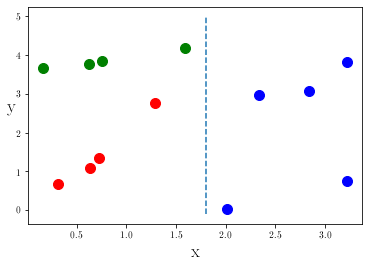

In [75]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(best_x_classifier, -0.1, 5, linestyles="dashed")


plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

This is the first decision, now let's find the second criterion:

In [76]:
y_splits = [1, 1.1, 1.2, 2.5, 3, 4]

In [77]:
_dic_ = {"r" : y_c1, "b" : y_c2, "g" : y_c3} 

groups_splited_y = devide_to_subgroups(split_data(y_c123_x_selected, y_splits), _dic_)

In [78]:
root_node = [y_c1, y_c2, y_c3]

G0 = Gini_impurity(root_node)
print("The Gini Impurity for the root node is =", G0, "\n", "===\n")

gains = []

for i, group in enumerate(groups_splited_y):
    
    size0, size1 = len(group[0]), len(group[1])
    gini0, gini1 = Gini_impurity(group[0]), Gini_impurity(group[1])
    
    Average_weighted_gini = (size0 * gini0 + size1 * gini1)/(size0 + size1)
    
    gini_gain = G0 - Average_weighted_gini
    
    gains.append(gini_gain)
    print("The Gini Impurity for split {} is =".format(i+1),round(Average_weighted_gini,3), "\n"
          "The Gini gain is = ", round(gini_gain,3), "\n", "-------\n")

The Gini Impurity for the root node is = 0.6627218934911243 
 ===

The Gini Impurity for split 1 is = 0.327 
The Gini gain is =  0.336 
 -------

The Gini Impurity for split 2 is = 0.296 
The Gini gain is =  0.366 
 -------

The Gini Impurity for split 3 is = 0.296 
The Gini gain is =  0.366 
 -------

The Gini Impurity for split 4 is = 0.213 
The Gini gain is =  0.449 
 -------

The Gini Impurity for split 5 is = 0.0 
The Gini gain is =  0.663 
 -------

The Gini Impurity for split 6 is = 0.327 
The Gini gain is =  0.336 
 -------



In [79]:
gain_split = [(i, j) for i,j in zip(gains, y_splits)]
gain_split.sort(reverse=True)

best_y_classifier = gain_split[0][1]

Which gives us the classifier we come up with:

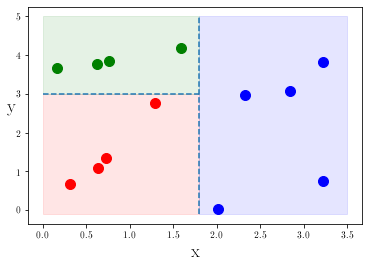

In [80]:
plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)


plt.vlines(best_x_classifier, -0.1, 5, linestyles="dashed")
plt.hlines(best_y_classifier, 0, best_x_classifier, linestyles="dashed")


plt.fill_between([0, 1.8], [-0.1, -0.1], [best_y_classifier, best_y_classifier], color="red", alpha=0.1)
plt.fill_between([1.8, 3.5], [-0.1, -0.1], [5, 5], color="blue", alpha=0.1)
plt.fill_between([0, 1.8], [best_y_classifier, best_y_classifier], [5, 5], color="green", alpha=0.1)
    

plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

Again using `sklearn`:

In [81]:
DTC_2 = DecisionTreeClassifier(criterion="gini", max_depth=2)

In [82]:
x_c123 = np.append(np.append(x_c1, x_c2), x_c3)
y_c123 = np.append(np.append(y_c1, y_c2), y_c3)

labels = ["red" for x in x_c1] + ["blue" for x in x_c2] + ["green" for x in x_c3]

X = np.c_[x_c123, y_c123]
print(X.shape)


DTC_2.fit(X, labels)

(13, 2)


DecisionTreeClassifier(max_depth=2)

In [83]:
x = np.linspace(0, 3.5, 30)
y = np.linspace(0, 5, 30)

x, y = np.meshgrid(x, y)

x = x.ravel()
y = y.ravel()

X_testing = np.c_[x, y]

colors = DTC_2.predict(X_testing)


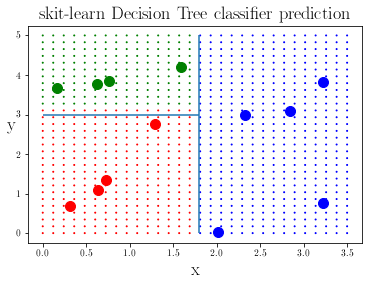

In [84]:
plt.scatter(x, y, c=colors, s = 1)



plt.plot(x_c1, y_c1, "r.", markersize=20)
plt.plot(x_c2, y_c2, "b.", markersize=20)
plt.plot(x_c3, y_c3, "g.", markersize=20)



plt.vlines(best_x_classifier, 0, 5)
plt.hlines(best_y_classifier, 0, best_x_classifier)


plt.title(r"skit-learn Decision Tree classifier prediction", fontsize =18)

plt.ylabel(r"y", rotation=0)
plt.xlabel(r"x")

plt.show()

Now that we saw how the Decision trees work let's apply it to more complicated data set and see the difference classification with differnt depths.

(85, 2)


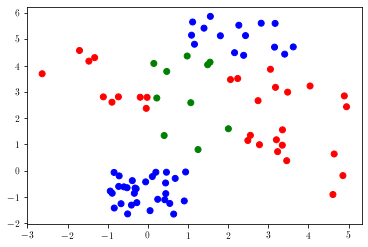

In [85]:
np.random.seed(33)

x_c1, x_c2, x_c3 = 2+3*np.random.random(20), -1+2*np.random.random(30), 2.5*np.random.random(10)
y_c1, y_c2, y_c3 = -1+5*np.random.random(20), -2+2*np.random.random(30), 5*np.random.random(10)

x_c1 = np.append(x_c1, -3+3*np.random.random(10))
y_c1 = np.append(y_c1, 2+3*np.random.random(10))

x_c2 = np.append(x_c2, 1+3*np.random.random(15))
y_c2 = np.append(y_c2, 4+2*np.random.random(15))

x_c123 = np.append(np.append(x_c1, x_c2), x_c3)
y_c123 = np.append(np.append(y_c1, y_c2), y_c3)

labels = ["red" for x in x_c1] + ["blue" for x in x_c2] + ["green" for x in x_c3]

X = np.c_[x_c123, y_c123]
print(X.shape)


plt.scatter(x_c123, y_c123, c = labels)

plt.show()

In [86]:
def _plot_dtc_(depth=1, criterion="gini"): 
    DTC_ = DecisionTreeClassifier(criterion=criterion, max_depth=depth)

    DTC_.fit(X, labels)


    x = np.linspace(-3, 5, 40)
    y = np.linspace(-3, 6, 40)

    x, y = np.meshgrid(x, y)

    x = x.ravel()
    y = y.ravel()

    X_testing = np.c_[x, y]

    colors = DTC_.predict(X_testing)

    fig = plt.scatter(x, y, c=colors, s = 1)

    plt.scatter(x_c123, y_c123, c = labels)
    
    plt.title(r"Depth of the tree is {} with ".format(depth)+criterion, fontsize= 14)
    
    return fig

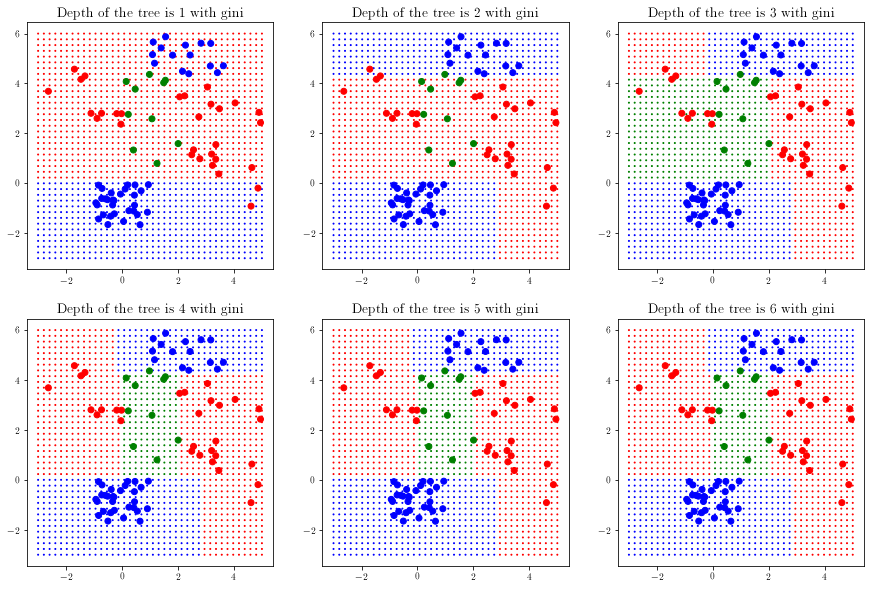

In [87]:
plt.figure(figsize=(15,10))
plt.subplot(231); _plot_dtc_(1)
plt.subplot(232); _plot_dtc_(2)
plt.subplot(233); _plot_dtc_(3)


plt.subplot(234); _plot_dtc_(4)
plt.subplot(235); _plot_dtc_(5)
plt.subplot(236); _plot_dtc_(6)

plt.show()

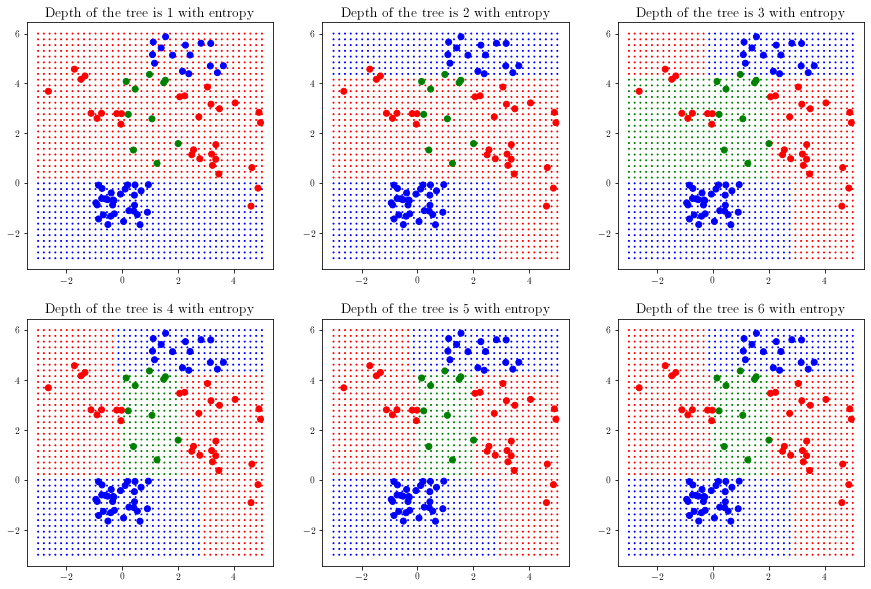

In [88]:
plt.figure(figsize=(15,10))
plt.subplot(231); _plot_dtc_(1, criterion="entropy")
plt.subplot(232); _plot_dtc_(2, criterion="entropy")
plt.subplot(233); _plot_dtc_(3, criterion="entropy")


plt.subplot(234); _plot_dtc_(4, criterion="entropy")
plt.subplot(235); _plot_dtc_(5, criterion="entropy")
plt.subplot(236); _plot_dtc_(6, criterion="entropy")

plt.show()